In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Task 1
Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices
$$
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
$$

$$
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}
$$

In [2]:
data = {}
data["uniform"] = np.random.uniform(0.0, 1.0, 1000)
data["normal_1"] = np.random.normal(0.0, 1.0, 1000)
data["normal_2"] = np.random.normal(0.0, 10.0, 1000)
data["beta_1"] = np.random.beta(1.0, 1.0, 1000)
data["beta_2"] = np.random.beta(2.0, 2.0, 1000)
data["beta_3"] = np.random.beta(3.0, 9.0, 1000)
data["2D_1"] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 10000)
data["2D_2"]  = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10000)

### Task 2
For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

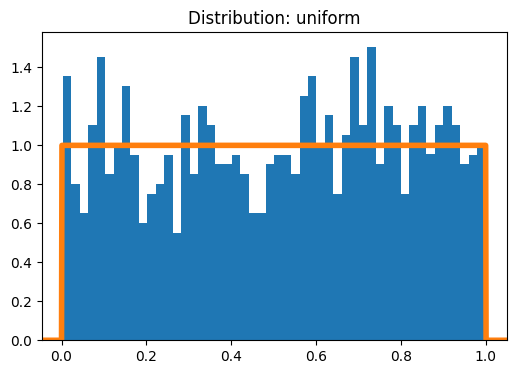

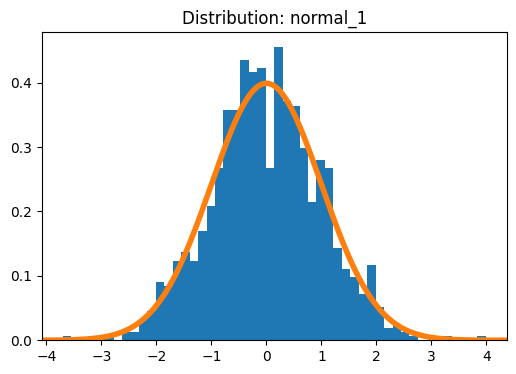

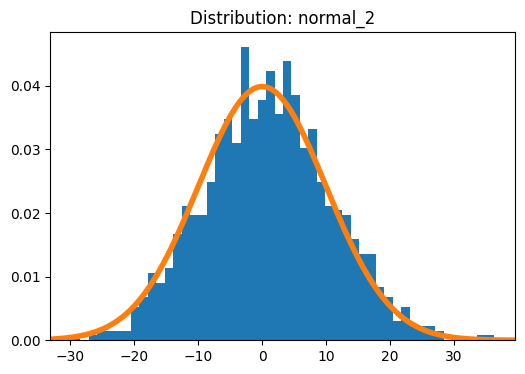

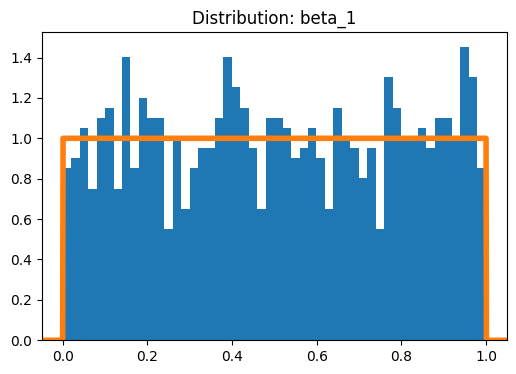

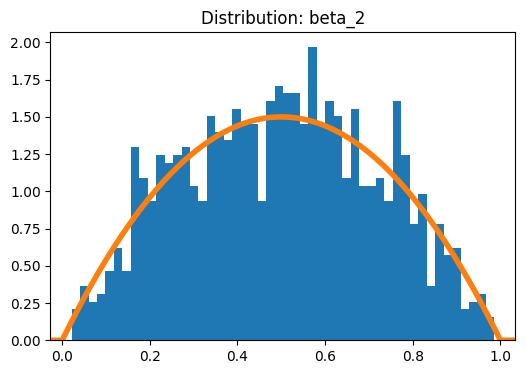

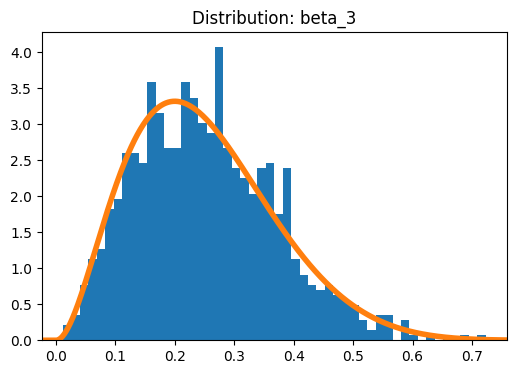

In [3]:
x_anal = np.arange(-40, 40, 0.001)
y_anal = {}
y_anal["uniform"] = stats.uniform.pdf(x_anal)
y_anal["normal_1"] = stats.norm.pdf(x_anal, 0.0, 1.0)
y_anal["normal_2"] = stats.norm.pdf(x_anal, 0.0, 10.0)
y_anal["beta_1"] = stats.beta.pdf(x_anal, 1.0, 1.0)
y_anal["beta_2"] = stats.beta.pdf(x_anal, 2.0, 2.0)
y_anal["beta_3"] = stats.beta.pdf(x_anal, 3.0, 9.0)

dists_1D = ["uniform", "normal_1", "normal_2", "beta_1", "beta_2", "beta_3"]
for dis in dists_1D:
    plt.figure(figsize=(6, 4))
    plt.hist(data[dis], bins=50, density=True)
    axes = plt.gca()
    xlim = axes.get_xlim()
    plt.plot(x_anal, y_anal[dis], linewidth=4)
    axes.set_xlim(xlim)
    plt.title("Distribution: {}".format(dis))
    plt.show()

### Task 3
For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).

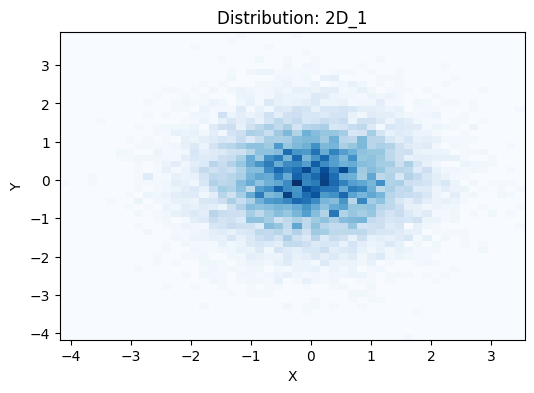

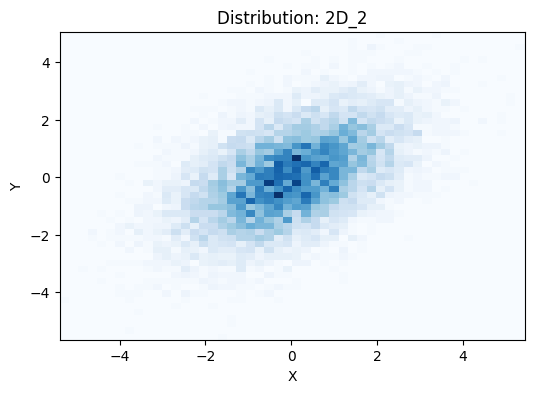

In [4]:
dists_2D = ["2D_1", "2D_2"]

# pyplot
for dis in dists_2D:
    plt.figure(figsize=(6, 4))
    plt.hist2d(data[dis][:, 0], data[dis][:, 1], bins=50, cmap="Blues")
    plt.title("Distribution: {}".format(dis))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

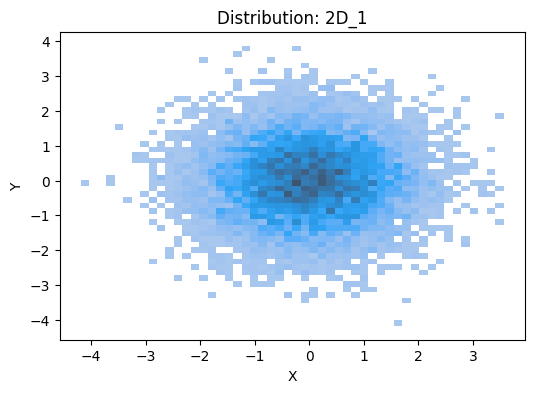

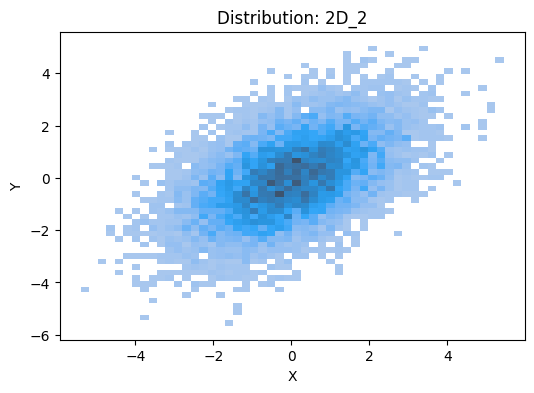

In [5]:
#seaborn
for dis in dists_2D:
    df = pd.DataFrame(data[dis], columns=["X", "Y"])
    plt.figure(figsize=(6, 4))
    sns.histplot(df, x="X", y="Y",bins=50)
    plt.title("Distribution: {}".format(dis))
    plt.show()

### Task 4
Generate 1000 y points from the following model ( First sample $\alpha$, $\beta$, x ,$\sigma$ then compute $\mu$ algebraically, then sample a value of y. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
$$    
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
$$

In [6]:
alpha = np.random.normal(2.0, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
X = np.random.normal(0.0, 3.0, 1000)
tau = np.abs(np.random.normal(0.0, 1.0, 1000))
mi = alpha + beta * X
Y = np.random.normal(mi, tau)

### Task 5
Plot y values as a function of x. Compare them with lines of y=α+βx, plotted for x between -6 and 6 for each of randomly sampled α and β pair (on the same plot).

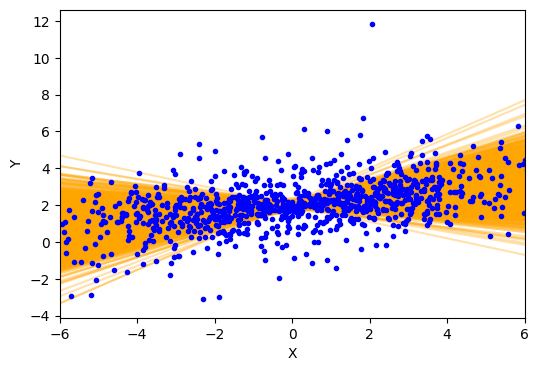

In [7]:
plt.figure(figsize=(6, 4))
x = np.linspace(-6, 6)
for i in range(0, 1000):
    f = lambda x: alpha[i] + x * beta[i]
    plt.plot(x, f(x), alpha=0.33, color="orange")
plt.plot(X, Y, 'b.')
plt.xlim([-6, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()